In [3]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
from matplotlib import pyplot as plt
%matplotlib inline
iris = pd.read_csv('iris.data', names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'])
test_data=iris[iris['Name'].isin(['Iris-setosa', 'Iris-versicolor'])] 
# select 'Iris-setosa' and 'Iris-versicolor' data to form testing dataset as pd.dataframe format
test_data.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
target_class = {
    'Iris-setosa': 0,
    'Iris-versicolor' : 1
}
color = {
    0:'r',
    1:'b'
}
test_data = test_data.assign(Class = test_data['Name'].map(target_class))
test_data = test_data.assign(Color = test_data['Class'].map(color))
test_data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,0,r
1,4.9,3.0,1.4,0.2,Iris-setosa,0,r
2,4.7,3.2,1.3,0.2,Iris-setosa,0,r
3,4.6,3.1,1.5,0.2,Iris-setosa,0,r
4,5.0,3.6,1.4,0.2,Iris-setosa,0,r
5,5.4,3.9,1.7,0.4,Iris-setosa,0,r
6,4.6,3.4,1.4,0.3,Iris-setosa,0,r
7,5.0,3.4,1.5,0.2,Iris-setosa,0,r
8,4.4,2.9,1.4,0.2,Iris-setosa,0,r
9,4.9,3.1,1.5,0.1,Iris-setosa,0,r


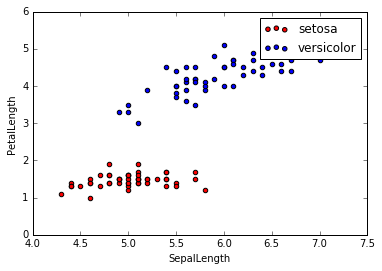

In [5]:
# plot data
ax=test_data[test_data['Class'] == 0].plot.scatter(x = 'SepalLength', y = 'PetalLength', color='r', label='setosa')
test_data[test_data['Class'] == 1].plot.scatter(x = 'SepalLength', y = 'PetalLength', color='b', label='versicolor', ax=ax)

In [6]:
y = test_data['Class'].to_numpy()
X = test_data.drop(columns=['SepalWidth','PetalWidth','Name', 'Class', 'Color']).to_numpy()
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
# bias = 1
X = np.insert(X, 0, 1, axis = 1)
X

array([[1. , 5.1, 1.4],
       [1. , 4.9, 1.4],
       [1. , 4.7, 1.3],
       [1. , 4.6, 1.5],
       [1. , 5. , 1.4],
       [1. , 5.4, 1.7],
       [1. , 4.6, 1.4],
       [1. , 5. , 1.5],
       [1. , 4.4, 1.4],
       [1. , 4.9, 1.5],
       [1. , 5.4, 1.5],
       [1. , 4.8, 1.6],
       [1. , 4.8, 1.4],
       [1. , 4.3, 1.1],
       [1. , 5.8, 1.2],
       [1. , 5.7, 1.5],
       [1. , 5.4, 1.3],
       [1. , 5.1, 1.4],
       [1. , 5.7, 1.7],
       [1. , 5.1, 1.5],
       [1. , 5.4, 1.7],
       [1. , 5.1, 1.5],
       [1. , 4.6, 1. ],
       [1. , 5.1, 1.7],
       [1. , 4.8, 1.9],
       [1. , 5. , 1.6],
       [1. , 5. , 1.6],
       [1. , 5.2, 1.5],
       [1. , 5.2, 1.4],
       [1. , 4.7, 1.6],
       [1. , 4.8, 1.6],
       [1. , 5.4, 1.5],
       [1. , 5.2, 1.5],
       [1. , 5.5, 1.4],
       [1. , 4.9, 1.5],
       [1. , 5. , 1.2],
       [1. , 5.5, 1.3],
       [1. , 4.9, 1.5],
       [1. , 4.4, 1.3],
       [1. , 5.1, 1.5],
       [1. , 5. , 1.3],
       [1. , 4.5

In [9]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    # x should be inner product between X and W 
    return 1 / (1 + np.exp(-x))

In [10]:
def net_input(w, x):
    # Computes the weighted sum of inputs 
    return np.dot(x,w)

In [11]:
def probability(w, x):
    # Returns the probability after passing through sigmoid
    return sigmoid(net_input(w, x))

In [12]:
def cost_function(w, x, y):
    # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1/m) * np.sum(y*np.log(probability(w,x)) + (1-y)*np.log(1 - probability(w,x)))
    return total_cost

In [13]:
def gradient(w, x, y):
    # Computes the gradient of the cost function
    m = x.shape[0]
    return (1/m) * np.dot(x.T, sigmoid(net_input(w, x)) - y)

In [38]:
def fit(x, y, w, l_rate):
    opt_weights = opt.fmin_tnc(func=cost_function, x0 = w, fprime = gradient, args = (x, y.flatten()), eta=l_rate)
    print('Solution:', opt_weights[0])
    print('Num of function evaluation:', opt_weights[1])
    return opt_weights[0]

In [39]:
parameters = fit(X, y, [-1, 1, 2], l_rate=0.5)

Solution: [-7.38286984 -6.72974215 16.56825944]
Num of function evaluation: 100


c:\python35\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log
c:\python35\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in multiply


In [40]:
print(parameters)

[-7.38286984 -6.72974215 16.56825944]


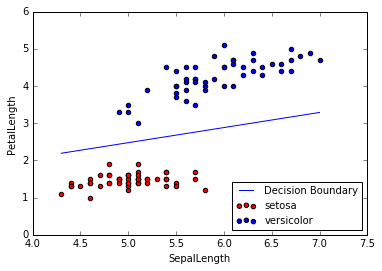

In [41]:
# plot data
plt.scatter(X[y==0,1],X[y==0,2],c='r', label='setosa')
plt.scatter(X[y>0,1],X[y>0,2],c='b', label='versicolor')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
x_values = [np.min(X[:, 1] ), np.max(X[:, 1])]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.legend(loc='lower right', fontsize='medium')
plt.show()